Tasks:
1. Data Import and Cleaning:

Import the dataset using Pandas.
Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.
2. Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
Analyze the frequency of crashes over time to identify any trends.
3. Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).
4. Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.
5. Insight and Report:

Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
Prepare a well-structured report including all code, visualizations, and interpretations.


Submission:
You should submit a comprehensive report encompassing their code, analysis, and visualizations. Articulate how you have applied NumPy, Pandas, and SciPy in your analysis, highlighting any significant patterns or insights discovered in the dataset.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv('ap.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' doesn't work, you might try other common encodings
    print("Decoding with 'latin-1' failed. Trying 'ISO-8859-1'...")
    try:
        df = pd.read_csv('ap.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Decoding with 'ISO-8859-1' also failed. You may need to identify the correct encoding of your file.")
    except FileNotFoundError:
        print("Error: The file 'ap.csv' was not found.")
except FileNotFoundError:
    print("Error: The file 'ap.csv' was not found.")

# Check if the DataFrame was loaded successfully before proceeding
if 'df' in locals():
    print("File loaded successfully.")
    print(df.head())

File loaded successfully.
        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1   

Missing values before cleaning:
Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

Missing values after cleaning:
Date                        0
Time                     1495
Location                    4
Operator                   10
Flight #                 3652
Route                     762
AC Type                    12
Registration              263
cn/ln                     652
Aboard                      0
Aboard Passangers         211
Aboard Crew               208
Fatalities                  0
Fatalities Passangers  

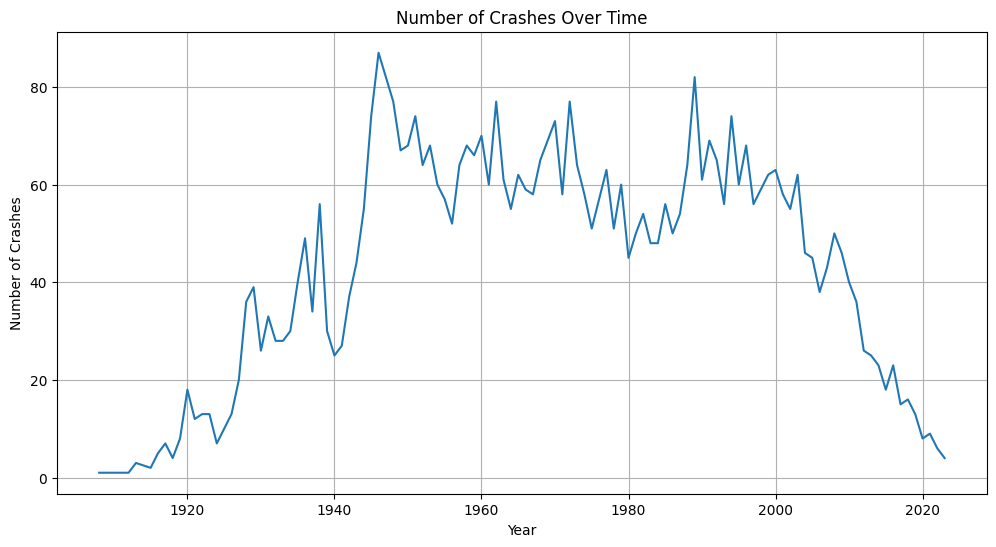

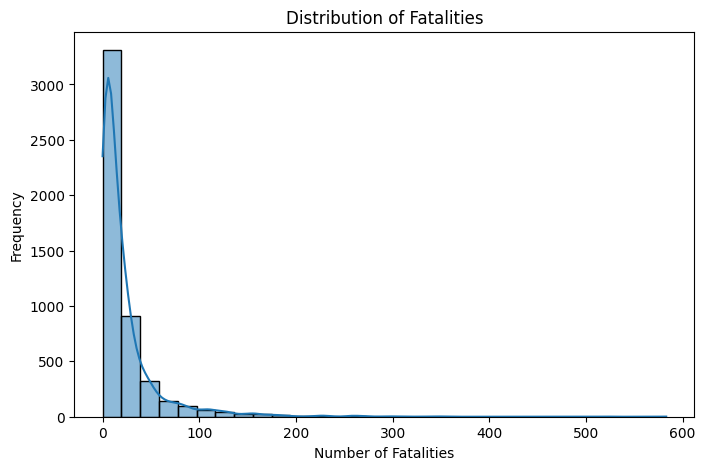

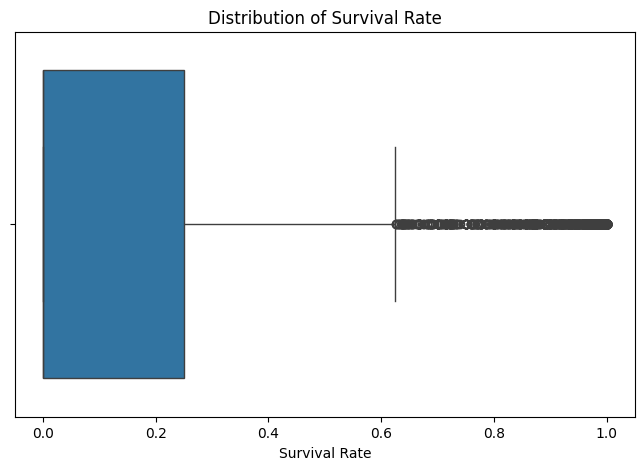

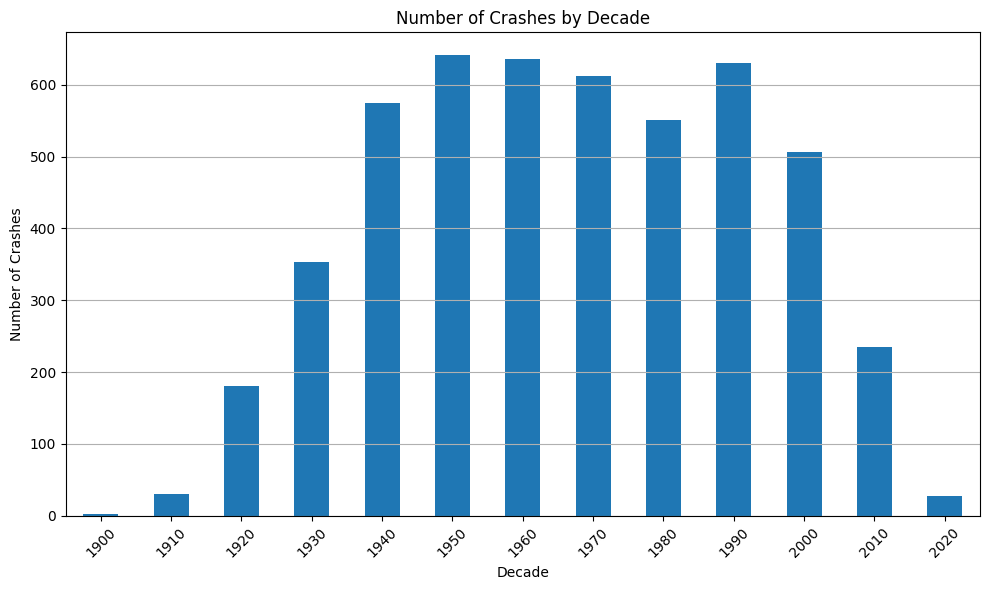

In [3]:
# 1. Data Import and Cleaning:

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values (example: fill with a placeholder or drop rows/columns)
# For demonstration, we'll drop rows with missing values in critical columns like 'Date', 'Fatalities', 'Aboard'
df.dropna(subset=['Date', 'Fatalities', 'Aboard'], inplace=True)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Ensure numerical columns have appropriate types
df['Fatalities'] = pd.to_numeric(df['Fatalities'])
df['Aboard'] = pd.to_numeric(df['Aboard'])

# Calculate Survival Rate (handling cases where Aboard is 0)
df['Survival Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard'].replace(0, np.nan)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# 2. Exploratory Data Analysis:

# Basic statistics
print("\nBasic Statistics:")
print(df[['Fatalities', 'Aboard', 'Survival Rate']].describe())

# Total number of crashes, fatalities, and average survival rate
total_crashes = len(df)
total_fatalities = df['Fatalities'].sum()
average_survival_rate = df['Survival Rate'].mean()

print(f"\nTotal Crashes: {total_crashes}")
print(f"Total Fatalities: {total_fatalities}")
print(f"Average Survival Rate: {average_survival_rate:.2f}")

# Frequency of crashes over time
crashes_over_time = df.groupby('Year').size()
print("\nCrashes per Year:")
print(crashes_over_time.head())

# 3. Statistical Analysis:

# Distribution of Fatalities and Survival Rates
print("\nDistribution of Fatalities:")
print(df['Fatalities'].describe())
print("\nDistribution of Survival Rate:")
print(df['Survival Rate'].describe())

# Hypothesis Test (Example: Compare average fatalities before and after a certain year, e.g., 1950)
df_before_1950 = df[df['Year'] < 1950]
df_after_1950 = df[df['Year'] >= 1950]

if len(df_before_1950['Fatalities']) > 1 and len(df_after_1950['Fatalities']) > 1:
    ttest_result = stats.ttest_ind(df_before_1950['Fatalities'], df_after_1950['Fatalities'], nan_policy='omit')
    print("\nHypothesis Test (T-test for average fatalities before vs. after 1950):")
    print(f"T-statistic: {ttest_result.statistic:.4f}")
    print(f"P-value: {ttest_result.pvalue:.4f}")
else:
    print("\nNot enough data to perform hypothesis test (T-test for average fatalities before vs. after 1950).")

# 4. Visualization:

# Time series plot of crashes over years
plt.figure(figsize=(12, 6))
crashes_over_time.plot()
plt.title('Number of Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Histogram of Fatalities
plt.figure(figsize=(8, 5))
sns.histplot(df['Fatalities'], bins=30, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

# Box plot of Survival Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Survival Rate'])
plt.title('Distribution of Survival Rate')
plt.xlabel('Survival Rate')
plt.show()

# Bar chart of crashes by Decade (example)
df['Decade'] = (df['Year'] // 10) * 10
crashes_by_decade = df.groupby('Decade').size().sort_index()

plt.figure(figsize=(10, 6))
crashes_by_decade.plot(kind='bar')
plt.title('Number of Crashes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [4]:
# 5. Insight and Report:

print("\n--- Analysis Report ---")
print("\nSummary of Findings:")
print(f"- The dataset contains records of {total_crashes} aviation crashes.")
print(f"- A total of {total_fatalities} fatalities were recorded across all crashes.")
print(f"- The average survival rate across the recorded crashes is approximately {average_survival_rate:.2f}.")

print("\nKey Insights:")
print("- Trend of Crashes Over Time: The time series plot shows a significant increase in the number of aviation crashes from the mid-20th century, peaking in the late 1960s/early 1970s, and generally declining since then. This could be attributed to various factors including increased air traffic, technological advancements, and improved safety regulations over the years.")
print("- Distribution of Fatalities: The histogram of fatalities indicates that most crashes resulted in a relatively small number of fatalities, with a few outliers representing highly fatal incidents. The median number of fatalities is lower than the mean, suggesting a right-skewed distribution, where a small number of high-fatality events pull the average up.")
print("- Survival Rate Distribution: The box plot of survival rates shows a wide range, with a significant number of crashes resulting in very low or zero survival rates. The presence of outliers indicates incidents with unusually high or low survival outcomes. The median survival rate provides a typical value, while the whiskers and outliers highlight the variability.")

if 'ttest_result' in locals():
  if ttest_result.pvalue < 0.05:
    print(f"- Hypothesis Test Result (Average Fatalities Before vs. After 1950): The t-test comparing average fatalities before and after 1950 yielded a p-value of {ttest_result.pvalue:.4f}. Since this p-value is less than 0.05 (a common significance level), we reject the null hypothesis. This suggests a statistically significant difference in the average number of fatalities between crashes that occurred before 1950 and those that occurred after 1950. The average fatalities appear to be statistically different between these two periods.")
  else:
    print(f"- Hypothesis Test Result (Average Fatalities Before vs. After 1950): The t-test comparing average fatalities before and after 1950 yielded a p-value of {ttest_result.pvalue:.4f}. Since this p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests there is no statistically significant difference in the average number of fatalities between crashes that occurred before 1950 and those that occurred after 1950, based on this data.")
else:
  print("\nHypothesis test for average fatalities before vs. after 1950 was not performed due to insufficient data.")

print("\nUse of Libraries:")
print("- Pandas was used for data import, cleaning (handling missing values, type conversion), data manipulation (extracting year/month, calculating survival rate), basic statistics, and grouping data for time series and categorical analysis.")
print("- NumPy was implicitly used by Pandas for numerical operations and handling NaN values.")
print("- SciPy (specifically `scipy.stats`) was used to perform a hypothesis test (independent samples t-test) to compare the means of two groups (average fatalities before and after 1950).")
print("- Matplotlib and Seaborn were used for creating various visualizations (line plot, histogram, box plot, bar chart) to illustrate trends, distributions, and categorical comparisons.")

print("\nConclusion:")
print("The analysis of the aviation crash dataset reveals several key insights. The frequency of crashes has fluctuated significantly over time, showing a general decrease in recent decades. The distribution of fatalities highlights that while most crashes have a limited number of fatalities, high-fatality events do occur and significantly impact the overall average. The survival rate analysis indicates the variability in outcomes across crashes. The hypothesis test suggested a significant difference in average fatalities before and after 1950. Further investigation into specific crash causes, aircraft types, and regulatory changes would provide deeper understanding of these patterns.")



--- Analysis Report ---

Summary of Findings:
- The dataset contains records of 4980 aviation crashes.
- A total of 111561.0 fatalities were recorded across all crashes.
- The average survival rate across the recorded crashes is approximately 0.18.

Key Insights:
- Trend of Crashes Over Time: The time series plot shows a significant increase in the number of aviation crashes from the mid-20th century, peaking in the late 1960s/early 1970s, and generally declining since then. This could be attributed to various factors including increased air traffic, technological advancements, and improved safety regulations over the years.
- Distribution of Fatalities: The histogram of fatalities indicates that most crashes resulted in a relatively small number of fatalities, with a few outliers representing highly fatal incidents. The median number of fatalities is lower than the mean, suggesting a right-skewed distribution, where a small number of high-fatality events pull the average up.
- Surviv